In [1]:
import os
import pandas as pd
from scipy import stats
import scipy
from scipy.stats import ttest_ind
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Task A

*Create the table with the sample means of characteristics by age, education, preintervention earnings, etc. for treated and control groups of NSW sample (you can use the Table 1 from  Dehejia and Wahba (1999) as a benchmark). Is the distribution of preintervention variables similar across the treatment and control groups? Check the differences on significance. Add to the table the CPS sample means. Is the comparison group different from the treatment group in terms of age, marital status, ethnicity, and preintervention earnings?*

In [7]:
#NSW data set
nsw = pd.read_csv('data/nsw_full.csv')
nsw = nsw.rename(columns={"education": "ed", "hispanic": "hisp", "nodegree": "nodeg"})
nsw = nsw.drop(['data_id'], axis=1)
nsw['age2'] = nsw.age**2
nsw.head()

,treat,age,ed,black,hisp,married,nodeg,re75,re78,re74,age2
0,1,37,11,1,0,1,1,0.0,9930.0460,0.0,1369
1,1,22,9,0,1,0,1,0.0,3595.8940,0.0,484
2,1,30,12,1,0,0,0,0.0,24909.4500,0.0,900
3,1,27,11,1,0,0,1,0.0,7506.1460,0.0,729
4,1,33,8,1,0,0,1,0.0,289.7899,0.0,1089


In [3]:
#CPS data set
cps = pd.read_csv('data/cps.csv')
cps.head()

,treat,age,ed,black,hisp,married,nodeg,re74,re75,re78,age2
0,0.0,45.0,11.0,0.0,0.0,1.0,1.0,21516.670,25243.550,25564.670,2025.0
1,0.0,21.0,14.0,0.0,0.0,0.0,0.0,3175.971,5852.565,13496.080,441.0
2,0.0,38.0,12.0,0.0,0.0,1.0,0.0,23039.020,25130.760,25564.670,1444.0
3,0.0,48.0,6.0,0.0,0.0,1.0,1.0,24994.370,25243.550,25564.670,2304.0
4,0.0,18.0,8.0,0.0,0.0,1.0,1.0,1669.295,10727.610,9860.869,324.0


In [21]:
# create the table with means of NSW treated, NSW control, CPS and check the differences between means on significance
nsw_treat = nsw[(nsw['treat'] == 1)]
nsw_untreat = nsw[(nsw['treat'] == 0)]
nsw_t_m = nsw_treat.mean()
nsw_ut_m = nsw_untreat.mean()
ttest_nsw,pval_nsw = ttest_ind(nsw_treat, nsw_untreat)
cps_m = cps.mean()
ttest_nsw_cps,pval_nsw_cps = ttest_ind(nsw_treat, cps_m)
data = np.column_stack((nsw_t_m,nsw_ut_m,pval_nsw,cps_m,pval_nsw_cps))
dataset = pd.DataFrame({'Sample mean NSW treated': data[:, 0], 'Sample mean NSW control': data[:, 1], 'p-value on difference between NSW treated and NSW control means': data[:, 2], 'Sample mean CPS': data[:, 3], 'p-value on difference between NSW treated and CPS means': data[:, 4],})
pd.options.display.float_format = '{:,.2f}'.format
dataset = dataset.T
dataset = dataset.drop([0, 9, 10], axis=1)
dataset = dataset.rename(columns={1: "Age", 2: "Education", 3:"Black", 4:"Hispanic", 5:"Married", 6:"No degree", 7:"Earnings74", 8:"Earnings75"})
dataset

,Age,Education,Black,Hispanic,Married,No degree,Earnings74,Earnings75
Sample mean NSW treated,25.82,10.35,0.84,0.06,0.19,0.71,"2,095.57","1,532.06"
Sample mean NSW control,25.05,10.09,0.83,0.11,0.15,0.83,"2,107.03","1,266.91"
p-value on difference between NSW treated and NSW control means,0.26,0.14,0.65,0.08,0.33,0.00,0.98,0.38
Sample mean CPS,33.23,12.03,0.07,0.07,0.71,0.30,"14,016.80","13,650.80"
p-value on difference between NSW treated and CPS means,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.02


# Task B.1

*Merge the treatment group data from the NSW sample with the comparison group data from the CPS sample to imitate an observational study.*

In [25]:
df = pd.concat([nsw[(nsw['treat'] == 1)], cps])
df

,treat,age,ed,black,hisp,married,nodeg,re74,re75,re78,age2
0,1.00,37.00,11.00,1.00,0.00,1.00,1.00,0.00,0.00,"9,930.05","1,369.00"
1,1.00,22.00,9.00,0.00,1.00,0.00,1.00,0.00,0.00,"3,595.89",484.00
2,1.00,30.00,12.00,1.00,0.00,0.00,0.00,0.00,0.00,"24,909.45",900.00
3,1.00,27.00,11.00,1.00,0.00,0.00,1.00,0.00,0.00,"7,506.15",729.00
4,1.00,33.00,8.00,1.00,0.00,0.00,1.00,0.00,0.00,289.79,"1,089.00"
...,...,...,...,...,...,...,...,...,...,...,...
15987,0.00,22.00,12.00,1.00,0.00,0.00,0.00,"3,975.35","6,801.44","2,757.44",484.00
15988,0.00,20.00,12.00,1.00,0.00,1.00,0.00,"1,445.94","11,832.24","6,895.07",400.00
15989,0.00,37.00,12.00,0.00,0.00,0.00,0.00,"1,733.95","1,559.37","4,221.86","1,369.00"
15990,0.00,47.00,9.00,0.00,0.00,1.00,1.00,"16,914.35","11,384.66","13,671.93","2,209.00"


# Task B.2

*Which assumption need to hold such that conditioning on observables can help in obtaining an unbiased estimate of the true treatment effect?*

$$E[Y^1|D = 1, S] = E[Y^1|D = 0, S]$$
$$E[Y^0|D = 1, S] = E[Y^0|D = 0, S]$$

# Task B.3

*Run a regression on both experimental and non-experimental data using the specification: RE78 on a constant, a treatment indicator, age, age2, education, marital status, no degree, black, hispanic, RE74, and RE75. We recommend using statsmodels, but you are free to use any other software. Is the treatment effect estimate of the observational study consistent with the true estimate?*

In [28]:
Y = nsw['re78']
X = nsw.drop(['re78'], axis=1)
X = sm.add_constant(X)
result = sm.OLS(Y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   re78   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     2.528
Date:                Thu, 26 Mar 2020   Prob (F-statistic):            0.00574
Time:                        01:28:02   Log-Likelihood:                -4534.1
No. Observations:                 445   AIC:                             9090.
Df Residuals:                     434   BIC:                             9135.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -307.0119   4807.584     -0.064      0.9

In [29]:
print('Treatment estimate in experimental study is {:5.2f}'.format(result.params["treat"]))

Treatment estimate in experimental study is 1675.86


In [30]:
Y = df['re78']
X = df.drop(['re78'], axis=1)
X = sm.add_constant(X)
result1 = sm.OLS(Y,X).fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                   re78   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     1469.
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        01:28:40   Log-Likelihood:            -1.6618e+05
No. Observations:               16177   AIC:                         3.324e+05
Df Residuals:                   16166   BIC:                         3.325e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7634.3440    736.671     10.363      0.0

In [31]:
print('Treatment estimate in observational study is {:5.2f}'.format(result1.params["treat"]))

Treatment estimate in observational study is 793.59


# Task C.1

*Before we start with matching on propensity score, let's come back to another matching strategy which was discussed in Lecture 5 - matching on stratification. Looking at the data could you name at least two potential reasons why matching on stratification might be impossible to use here?*

Data contains continuous variables; formed stratas might not have treated and control units available at the same time.

# Task C.2

*Employing our imitated observational data run a logistic regression on the following specification: treatment indicator on age, education, marital status, no degree, black, hispanic, RE74, and RE75. Use, for example, \texttt{statsmodels} for this task. Then extract a propensity score for every individual as a probability to be assigned into treatment.*

In [33]:
pscore = smf.logit(formula='treat ~ age + ed + black + hisp + married + nodeg + re74 + re75', data=df).fit().predict()
pscore

Optimization terminated successfully.
         Current function value: 0.031035
         Iterations 12


array([2.47511138e-01, 7.25790910e-02, 2.50397953e-01, ...,
       3.29936778e-03, 2.40801359e-04, 5.22213725e-04])

# Task C.3

*Before proceeding further we have to be sure that propensity scores of treatment units overlap with the propensity scores of control units. Draw a figure  showing the distribution of propensity score across treatment and control units (we use the packages matplotlib and seaborn). Do we observe common support?*

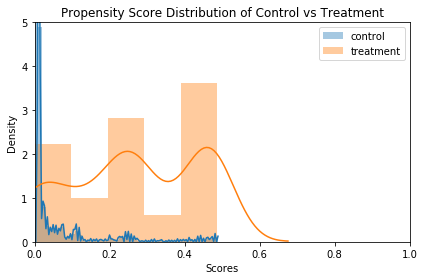

In [34]:
pscore_treat = pscore[df['treat'] == 1]
pscore_untreat = pscore[df['treat'] == 0]
sns.distplot(pscore_untreat, label='control')
sns.distplot(pscore_treat, label='treatment')
plt.xlim(0, 1)
plt.ylim(0, 5)
plt.title('Propensity Score Distribution of Control vs Treatment')
plt.ylabel('Density')
plt.xlabel('Scores')
plt.legend()
plt.tight_layout()
plt.show()

# Task C.4

*Match each treatment unit with control unit one-to-one with replacement. We use the package sklearn.neighbors: apply the algorithm NearestNeighbors to the propensity score of treated and control units and extract the indices of matched control units.*

In [139]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
neigh.fit(pscore_untreat.reshape(-1, 1))
distances, indices = neigh.kneighbors(pscore_treat.reshape(-1, 1))
matched = indices[:, 1:]

# Task C.5

*Construct new data set with matched observations. Run the regression to obtain matching on propensity score estimate. Is it more or less consistent estimate of the true effect comparing to the regression estimate with selection on observables? How could you explain this result?*

In [140]:
df_treat = df[df['treat'] == 1]
df_untreat = df[df['treat'] == 0].iloc[matched[:, 0]]
df_matched = pd.concat([df_treat, df_untreat])

Y = df_matched['re78']
X = df_matched['treat']
X = sm.add_constant(X)
result2 = sm.OLS(Y,X).fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                   re78   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     4.960
Date:                Thu, 26 Mar 2020   Prob (F-statistic):             0.0265
Time:                        02:28:54   Log-Likelihood:                -3784.4
No. Observations:                 370   AIC:                             7573.
Df Residuals:                     368   BIC:                             7581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4794.6237    493.563      9.714      0.0

C:\Users\liudm\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [141]:
print('Treatment estimate after matching on propensity score is {:5.2f}'.format(result2.params["treat"]))

Treatment estimate after matching on propensity score is 1554.52


Regression model neglects important nonlinear terms and interactions (Rubin 1973). The benefit of matching over regression is that it is non-parametric (but you do have to assume that you have the right propensity score specification in case of  matching).